importing packages

In [1]:
import pandas as pd
import os 
import numpy as np
import matplotlib.pyplot as plt

path set

In [2]:
os.getcwd()

'C:\\Users\\cgupta'

In [3]:
os.chdir(r'C:/Users/cgupta/Desktop/work')

In [4]:
os.getcwd()

'C:\\Users\\cgupta\\Desktop\\work'

fecthing the excel data

In [5]:
retail=pd.read_excel('Online Retail.xlsx','Online Retail',index_col=None, na_values=['NA'])

In [6]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


Filtering out the negative data cuz that is dirty data, we dont wanna recommend the items which were returned or rejected 

In [7]:
retail_noNegative=retail[retail['Quantity']>0]

In [8]:
retail_noNegative.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531285 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      531285 non-null object
StockCode      531285 non-null object
Description    530693 non-null object
Quantity       531285 non-null int64
InvoiceDate    531285 non-null datetime64[ns]
UnitPrice      531285 non-null float64
CustomerID     397924 non-null float64
Country        531285 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.5+ MB


Since there are fields which doesnt have a description so we have to check can we filter those fields out by seeing how many invoice numbers are involved, so we first drop the unnecessary fields. 


In [9]:
test3=retail_noNegative.drop(['InvoiceDate', 'UnitPrice', 'CustomerID','Country'],axis=1)
test3.head()

,InvoiceNo,StockCode,Description,Quantity
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6
1,536365,71053,WHITE METAL LANTERN,6
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6


filtering out the null descriptions

In [10]:
test5=test3[test3['Description'].isnull()].sort_values(by='Quantity', ascending=False)

grouping test5 by Stockcode vs invoice no..the max field tells us how many maximum invoice no are involved

In [11]:
pd.DataFrame(test5.groupby('StockCode')['InvoiceNo'].count()).sort_index(axis=1).describe()

,InvoiceNo
count,426.000000
mean,1.389671
std,0.880260
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,9.000000


Since only 9 is the maximum number of invoive no affected compared to 20136 ( see Out [18] ) total invoices so we can drop these fields with no description.

removing the null description feilds

In [12]:
retail_notnull=retail_noNegative[retail_noNegative['Description'].notnull()]

In [13]:
retail_notnull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530693 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      530693 non-null object
StockCode      530693 non-null object
Description    530693 non-null object
Quantity       530693 non-null int64
InvoiceDate    530693 non-null datetime64[ns]
UnitPrice      530693 non-null float64
CustomerID     397924 non-null float64
Country        530693 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.4+ MB


Dropping the unnecessary columns 

In [14]:
retail_clean=retail_notnull.drop(['InvoiceDate', 'UnitPrice', 'CustomerID','Country'],axis=1)

In [15]:
retail_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530693 entries, 0 to 541908
Data columns (total 4 columns):
InvoiceNo      530693 non-null object
StockCode      530693 non-null object
Description    530693 non-null object
Quantity       530693 non-null int64
dtypes: int64(1), object(3)
memory usage: 20.2+ MB


In [16]:
#pd.DataFrame(retail_clean.groupby('StockCode')['Description'].unique()).to_csv("p.csv")

In [17]:
print(len(retail_clean.Description.unique()))
print(len(retail_clean.StockCode.unique()))
print(len(retail_clean.InvoiceNo.unique()))

4077
3925
20136


we hypothesized that the stock code and Description will match in numbers but as the   says it has a difference of 152, so there is a problem.

test is the data frame which tells us the no of times a stockcode has appeared on an invoice no

In [18]:
test=retail_clean.groupby('StockCode')['InvoiceNo'].count()
test.head()

StockCode
10002     71
10080     23
10120     30
10125     94
10133    198
Name: InvoiceNo, dtype: int64

Stats of test which is comparision of StockCode and Invoice no

In [19]:
test.describe()

count    3925.000000
mean      135.208408
std       197.972915
min         1.000000
25%        16.000000
50%        65.000000
75%       169.000000
max      2270.000000
Name: InvoiceNo, dtype: float64

test2 is the data frame which tells us the no of times a Description has appeared on an invoice no

In [20]:
test2=retail_clean.groupby('Description')['InvoiceNo'].count()
test2.head()

Description
 4 PURPLE FLOCK DINNER CANDLES     41
 50'S CHRISTMAS GIFT BAG LARGE    129
 DOLLY GIRL BEAKER                179
 I LOVE LONDON MINI BACKPACK       88
 I LOVE LONDON MINI RUCKSACK        1
Name: InvoiceNo, dtype: int64

Stats of test which is comparision of Description and Invoice no

In [21]:
test2.describe()

count    4077.000000
mean      130.167525
std       193.220542
min         1.000000
25%        14.000000
50%        62.000000
75%       163.000000
max      2327.000000
Name: InvoiceNo, dtype: float64

As it can be seen test and test2 Stats has a difference in them while they were supposed to be same. SO we now find out what is missing out

In [22]:
retail_clean[retail_clean['Description']=='?'].sort_values(by='Quantity', ascending=False)

,InvoiceNo,StockCode,Description,Quantity
220843,556231,85123A,?,4000
115807,546139,84988,?,3000
38261,539494,21479,?,752
282882,561665,22171,?,142
421093,572920,72803A,?,117
323315,565288,23135,?,101


In [23]:
retail_clean[retail_clean['StockCode']=='85123A'].sort_values(by='Quantity', ascending=False)
demo1=retail_clean[retail_clean['StockCode']=='85123A'].sort_values(by='Quantity', ascending=False)
demo1.head()
demo1[demo1['Description']=='?']

,InvoiceNo,StockCode,Description,Quantity
220843,556231,85123A,?,4000


converting all "StockCode" and "Description" to lower case

In [24]:
retail_clean['StockCode']=retail_clean['StockCode'].apply(lambda x: str(x).lower()  )
retail_clean['Description']=retail_clean['Description'].apply(lambda x: str(x).lower()  )

In [25]:
retail_clean.head()

,InvoiceNo,StockCode,Description,Quantity
0,536365,85123a,white hanging heart t-light holder,6
1,536365,71053,white metal lantern,6
2,536365,84406b,cream cupid hearts coat hanger,8
3,536365,84029g,knitted union flag hot water bottle,6
4,536365,84029e,red woolly hottie white heart.,6


removing alpha numeric invoice no which is a bad data

In [26]:
retail_clean=retail_clean[retail_clean['InvoiceNo'].apply(lambda x: isinstance(x, (int, np.int64)))]

In [ ]:
print(len(retail_clean['Description'].unique()))
print(len(retail_clean['StockCode'].unique()))
print(len(retail_clean['InvoiceNo'].unique()))

type casting Invoice no Data type from object to Int64

In [28]:
retail_clean['InvoiceNo']=retail_clean['InvoiceNo'].astype('int64')

In [29]:
retail_clean.head(10)

,InvoiceNo,StockCode,Description,Quantity
0,536365,85123a,white hanging heart t-light holder,6
1,536365,71053,white metal lantern,6
2,536365,84406b,cream cupid hearts coat hanger,8
3,536365,84029g,knitted union flag hot water bottle,6
4,536365,84029e,red woolly hottie white heart.,6
5,536365,22752,set 7 babushka nesting boxes,2
6,536365,21730,glass star frosted t-light holder,6
7,536366,22633,hand warmer union jack,6
8,536366,22632,hand warmer red polka dot,6
9,536367,84879,assorted colour bird ornament,32


In [30]:
retail_cleaner = pd.DataFrame(retail_clean.groupby(['InvoiceNo','StockCode','Description'])['Quantity'].sum())

In [31]:
retail_cleaner.head()

Quantity
InvoiceNo StockCode Description                                  
536365    21730     glass star frosted t-light holder           6
          22752     set 7 babushka nesting boxes                2
          71053     white metal lantern                         6
          84029e    red woolly hottie white heart.              6
          84029g    knitted union flag hot water bottle         6

In [32]:
retail_cleaner.to_csv('retail_cleanest.csv' ,  index = True)

In [33]:
retail_cleanest=pd.read_csv('retail_cleanest.csv')

In [34]:
print(len(retail_cleanest['Description'].unique()))
print(len(retail_cleanest['StockCode'].unique()))
print(len(retail_cleanest['InvoiceNo'].unique()))

4071
3814
20133


In [35]:
retail_cleanest['Description']=retail_cleanest['Description'].str.replace(' ', '')

In [36]:
retail_cleanest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520155 entries, 0 to 520154
Data columns (total 4 columns):
InvoiceNo      520155 non-null int64
StockCode      520155 non-null object
Description    520155 non-null object
Quantity       520155 non-null int64
dtypes: int64(2), object(2)
memory usage: 15.9+ MB


In [37]:
print(len(retail_cleanest['Description'].unique()))
print(len(retail_cleanest['StockCode'].unique()))
print(len(retail_cleanest['InvoiceNo'].unique()))

4042
3814
20133


In [63]:
retail_cleanest.groupby('Description')['InvoiceNo'].count()

Description
*boomboxipodclassic                 1
*usbofficemirrorball                2
10colourspaceboypen               318
12colouredpartyballoons           163
12daisypegsinwoodbox               77
12egghousepaintedwood              99
12hangingeggshandpainted            7
12ivoryrosepegplacesettings       148
12messagecardswithenvelopes       251
12pencilsmalltubewoodland         355
12pencilssmalltuberedretrospot    362
12pencilssmalltubeskull           355
12pencilstalltubeposy             170
12pencilstalltuberedretrospot     268
12pencilstalltubeskulls           256
12pencilstalltubewoodland         249
12pinkhen+chicksinbasket           14
12pinkrosepegplacesettings         21
12redrosepegplacesettings         105
15cmchristmasglassball20lights    261
15pinkfluffychicksinbox             7
16pccutlerysetpantrydesign          1
16piececutlerysetpantrydesign      69
18pcwoodencutlerysetdisposable     43
200bendyskullstraws                55
200red+whitebendystraws           172


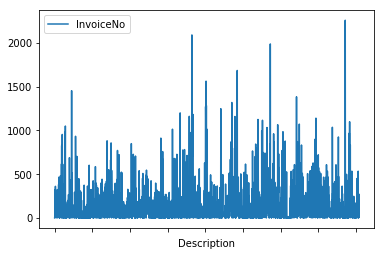

In [39]:
#pd.DataFrame(test_cleanest,index=None).plot('scatter')
pd.DataFrame(test6,index=None).plot.line()

In [64]:
test6.to_csv('test_cleanest.csv' ,  index = True)

In [65]:
test_cleanest_edited=pd.read_csv('test_cleanest_edited.csv')

In [67]:
test_cleanest_edited[test_cleanest_edited['CountInvoices']==1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 4031
Data columns (total 2 columns):
Description      200 non-null object
CountInvoices    200 non-null int64
dtypes: int64(1), object(1)
memory usage: 4.7+ KB
